## KAMAZ test

In [2]:
import numpy as np
import pandas as pd
import random
import statistics as stat
from datetime import date

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import plotly.graph_objs as go

import math
import matplotlib.dates as mdates
import time,datetime,matplotlib

In [3]:
import warnings

warnings.filterwarnings('ignore')

### Анализ данных

In [4]:
TRAIN_DATASET_PATH = 'test_job_kamaz_v2.csv'

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc
0,12,2020-10-28T05:40:14,5,NaN,NaN,115.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,12,2020-10-28T06:55:52,5,NaN,NaN,112.0,2.3,1107.0,35.0,-49.0,NaN,NaN,NaN,22.8,NaN
2,12,2020-10-28T07:08:51,5,NaN,NaN,115.0,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
3,12,2020-10-28T07:14:15,5,NaN,NaN,118.0,NaN,753.0,9.0,16.0,0.0,NaN,NaN,19.0,NaN
4,0,2020-10-28T20:31:41,4,NaN,NaN,97.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.tail()

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc
21078146,4,2020-12-05T19:13:04,2,4660.886,15638890.0,33.0,NaN,1032.0,85.0,69.0,NaN,NaN,NaN,NaN,NaN
21078147,4,2020-12-05T19:13:00,2,4660.856,15638765.0,33.0,NaN,1047.0,86.0,40.0,NaN,NaN,NaN,NaN,NaN
21078148,4,2020-12-05T19:13:06,2,NaN,NaN,33.0,NaN,NaN,84.0,NaN,NaN,NaN,NaN,2.6,NaN
21078149,4,2020-12-05T19:13:02,2,4660.866,15638815.0,33.0,NaN,1036.0,85.0,56.0,NaN,NaN,NaN,NaN,NaN
21078150,4,2020-12-05T19:13:02,2,4660.872,15638840.0,33.0,NaN,1038.0,85.0,60.0,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df.shape

(21078151, 15)

In [8]:
train_df.info()
# train_df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21078151 entries, 0 to 21078150
Data columns (total 15 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   imei                                    int64  
 1   time                                    object 
 2   vin                                     int64  
 3   high_resolution_engine_total_fuel_used  float64
 4   high_resolution_total_vehicle_distance  float64
 5   altitude                                float64
 6   axle_weight                             float64
 7   engine_speed                            float64
 8   speed                                   float64
 9   accelerator_pedal_position_1            float64
 10  brake_pedal_position                    float64
 11  ignition_lock_state                     float64
 12  battery_voltage                         float64
 13  battery_current                         float64
 14  soc                             

In [9]:
train_df.describe()  #обзорная таблица с признаками

,imei,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc
count,2.107815e+07,2.107815e+07,1.329470e+07,1.291337e+07,2.080979e+07,2.873371e+06,1.441178e+07,2.080979e+07,7.251471e+06,629792.000000,13555.000000,218694.000000,955205.000000,110094.000000
mean,5.681660e+00,5.241880e+00,3.927183e+03,1.215135e+07,1.567824e+02,8.232517e+00,1.026307e+03,5.547333e+01,4.021023e+01,10.514953,1.755515,27.609224,6.073393,64.711435
std,4.374764e+00,3.970053e+00,2.403368e+03,7.554679e+06,1.086809e+02,1.727127e+00,2.459370e+02,3.136238e+01,3.562578e+01,13.991099,0.826009,0.831857,11.595630,16.458868
min,0.000000e+00,0.000000e+00,-6.553600e+01,0.000000e+00,-7.610000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-5.100000e+01,0.000000,0.000000,0.200000,-479.800000,0.000000
25%,2.000000e+00,2.000000e+00,1.916714e+03,5.833715e+06,9.900000e+01,8.200000e+00,9.480000e+02,3.300000e+01,1.900000e+01,1.000000,1.000000,27.700000,1.600000,53.600000
50%,5.000000e+00,5.000000e+00,3.677817e+03,1.124054e+07,1.360000e+02,8.500000e+00,1.047000e+03,6.900000e+01,4.500000e+01,6.000000,2.000000,27.900000,3.600000,67.500000
75%,1.000000e+01,8.000000e+00,5.783776e+03,1.804421e+07,1.840000e+02,8.900000e+00,1.185000e+03,8.100000e+01,6.700000e+01,15.000000,2.000000,28.000000,8.800000,77.200000
max,1.300000e+01,1.300000e+01,9.653434e+03,2.918320e+07,1.485000e+03,3.270000e+01,8.128000e+03,2.220000e+02,1.000000e+02,101.000000,3.000000,28.500000,123.100000,100.000000


Рассмотрим только с включением конкретного типа числовых значений, что является дублирование train_df.info() в расширенном виде. 

In [10]:
df_num_features = train_df.select_dtypes(include=['float64', 'int64'])
df_num_features.head()

,imei,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc
0,12,5,NaN,NaN,115.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,12,5,NaN,NaN,112.0,2.3,1107.0,35.0,-49.0,NaN,NaN,NaN,22.8,NaN
2,12,5,NaN,NaN,115.0,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
3,12,5,NaN,NaN,118.0,NaN,753.0,9.0,16.0,0.0,NaN,NaN,19.0,NaN
4,0,4,NaN,NaN,97.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_obj_features = train_df.select_dtypes(include='object')
df_obj_features.head()

,time
0,2020-10-28T05:40:14
1,2020-10-28T06:55:52
2,2020-10-28T07:08:51
3,2020-10-28T07:14:15
4,2020-10-28T20:31:41


In [12]:
df_num_features.corr() #корреляция признаков между собой. 

,imei,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc
imei,1.000000,0.456702,-0.227967,-0.184592,-0.081717,-0.080025,-0.055211,-0.016211,0.079945,0.072941,0.024134,-0.015482,-0.003604,0.177799
vin,0.456702,1.000000,-0.335368,-0.335649,0.159648,0.012316,0.114120,-0.042000,0.151761,0.101714,-0.032745,-0.069407,-0.027765,0.237633
high_resolution_engine_total_fuel_used,-0.227967,-0.335368,1.000000,0.996708,-0.065461,0.001603,-0.064356,0.000267,0.339517,-0.124177,-0.311776,-0.064457,0.000098,-0.689152
high_resolution_total_vehicle_distance,-0.184592,-0.335649,0.996708,1.000000,-0.081988,0.031768,-0.114731,-0.000789,0.330760,-0.054928,0.018929,0.140956,-0.188685,0.293559
altitude,-0.081717,0.159648,-0.065461,-0.081988,1.000000,0.019981,0.103171,-0.002022,-0.008121,-0.039978,0.003940,0.001982,-0.013963,0.007930
axle_weight,-0.080025,0.012316,0.001603,0.031768,0.019981,1.000000,0.122827,0.072859,0.080027,0.147073,-0.080628,-0.231973,-0.158104,-0.025092
engine_speed,-0.055211,0.114120,-0.064356,-0.114731,0.103171,0.122827,1.000000,0.602343,0.127346,-0.275818,0.094694,0.536614,-0.006523,0.252121
speed,-0.016211,-0.042000,0.000267,-0.000789,-0.002022,0.072859,0.602343,1.000000,0.139198,-0.280833,-0.056464,0.349079,-0.205395,0.228096
accelerator_pedal_position_1,0.079945,0.151761,0.339517,0.330760,-0.008121,0.080027,0.127346,0.139198,1.000000,-0.284041,-0.070757,-0.002225,0.086399,-0.105102
brake_pedal_position,0.072941,0.101714,-0.124177,-0.054928,-0.039978,0.147073,-0.275818,-0.280833,-0.284041,1.000000,0.081837,-0.485784,-0.244643,-0.106955


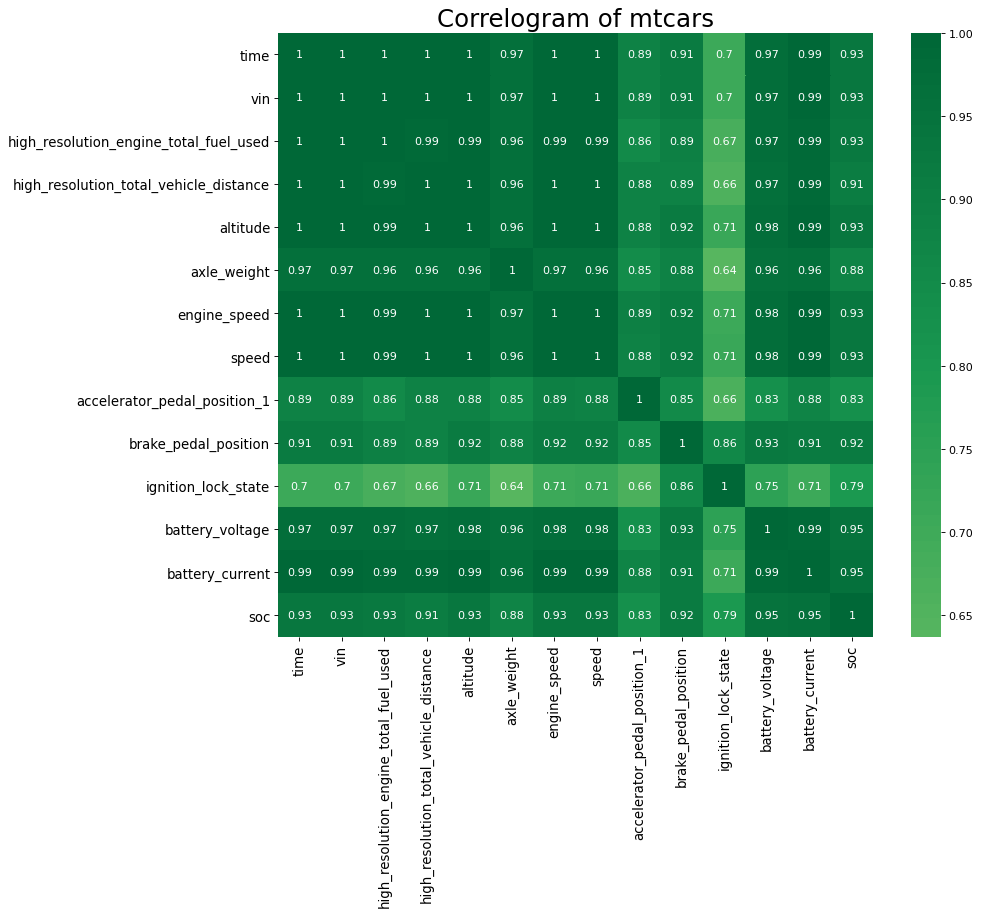

In [13]:
common_df = train_df.groupby('imei').count()

# Plot
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(common_df.corr(), xticklabels=common_df.corr().columns, yticklabels=common_df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

array([[<AxesSubplot:title={'center':'imei'}>,
        <AxesSubplot:title={'center':'vin'}>,
        <AxesSubplot:title={'center':'high_resolution_engine_total_fuel_used'}>,
        <AxesSubplot:title={'center':'high_resolution_total_vehicle_distance'}>],
       [<AxesSubplot:title={'center':'altitude'}>,
        <AxesSubplot:title={'center':'axle_weight'}>,
        <AxesSubplot:title={'center':'engine_speed'}>,
        <AxesSubplot:title={'center':'speed'}>],
       [<AxesSubplot:title={'center':'accelerator_pedal_position_1'}>,
        <AxesSubplot:title={'center':'brake_pedal_position'}>,
        <AxesSubplot:title={'center':'ignition_lock_state'}>,
        <AxesSubplot:title={'center':'battery_voltage'}>],
       [<AxesSubplot:title={'center':'battery_current'}>,
        <AxesSubplot:title={'center':'soc'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

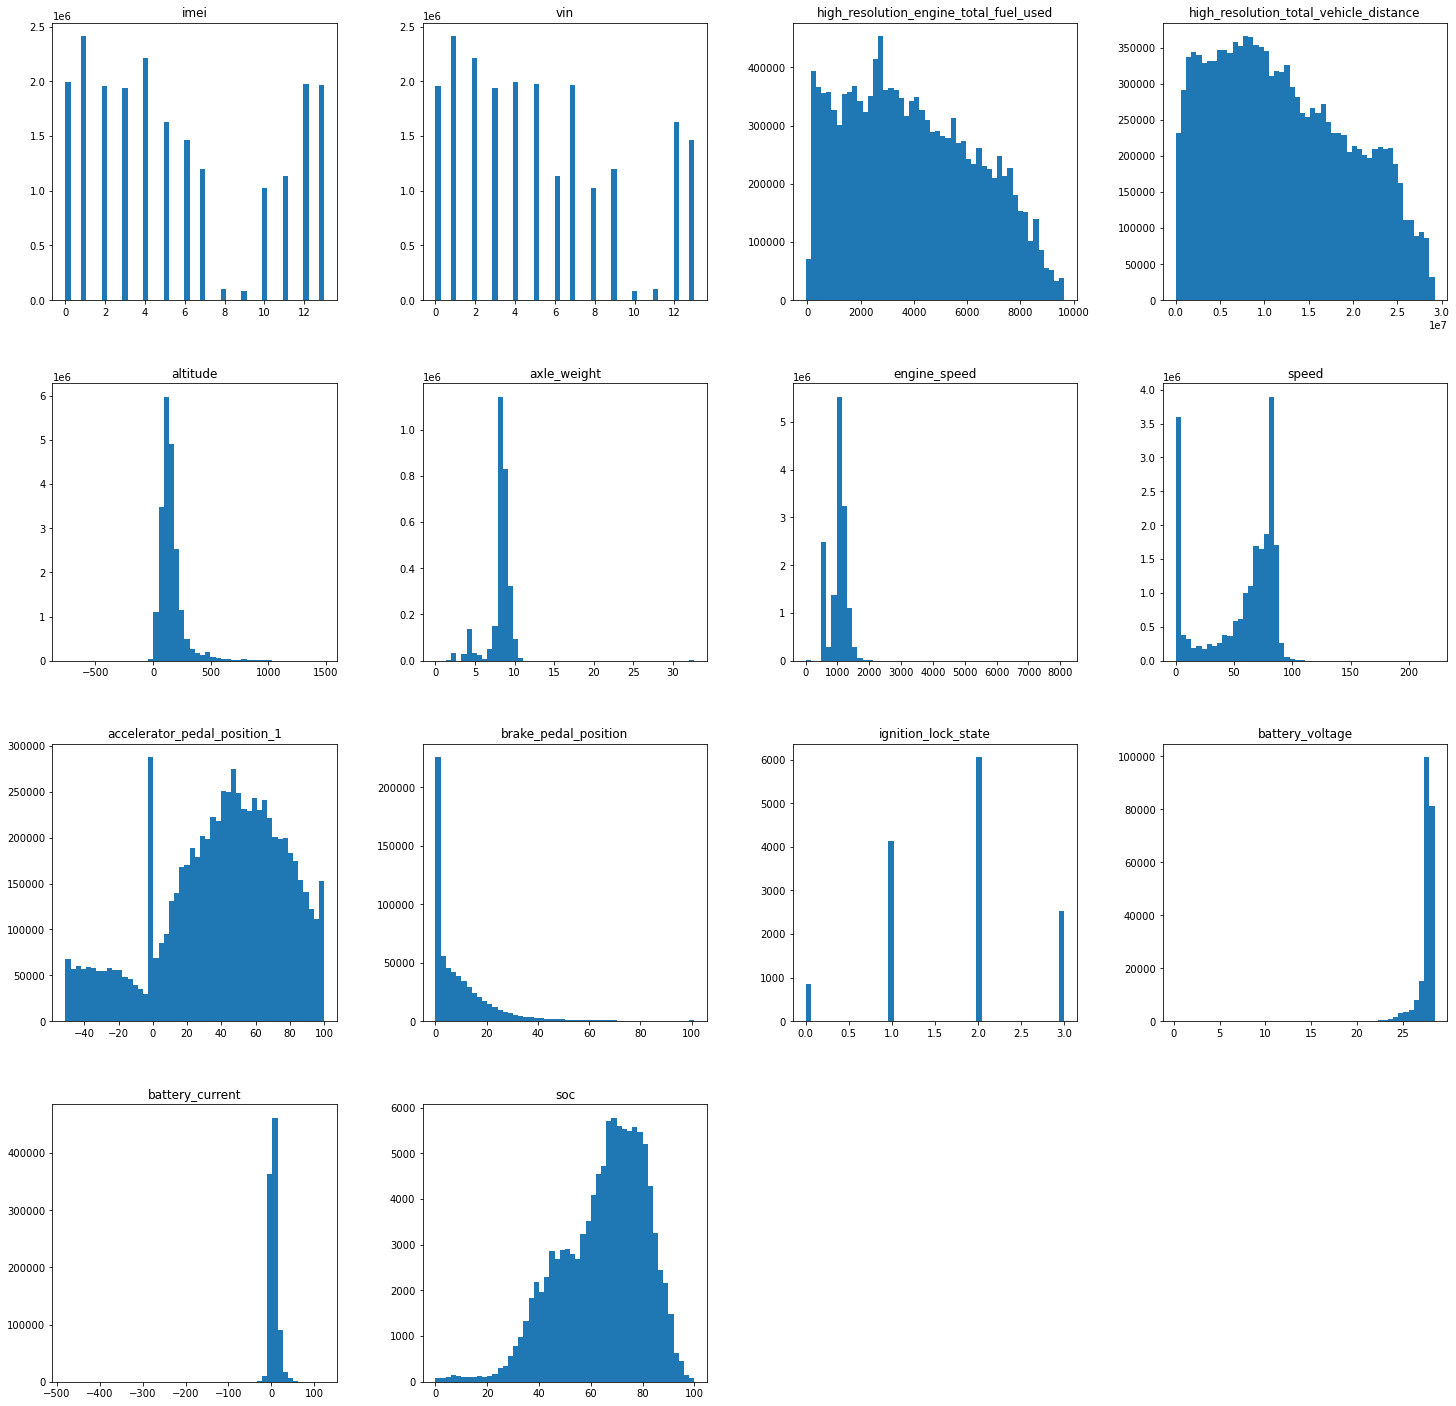

In [14]:
train_df.select_dtypes(exclude=['object']).hist(figsize=(25,25), bins=50, grid=False)

## Прежде чем переходить к процессу очистки, рассмотрим более подробно исходный датасет. 

Составим список долей отсутствующих записей для каждого признака

In [15]:
for col in train_df.columns:
    pct_missing = np.mean(train_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

imei - 0%
time - 0%
vin - 0%
high_resolution_engine_total_fuel_used - 37%
high_resolution_total_vehicle_distance - 39%
altitude - 1%
axle_weight - 86%
engine_speed - 32%
speed - 1%
accelerator_pedal_position_1 - 66%
brake_pedal_position - 97%
ignition_lock_state - 100%
battery_voltage - 99%
battery_current - 95%
soc - 99%


**Гистограмма пропущенных данных**

created missing indicator for: high_resolution_engine_total_fuel_used
created missing indicator for: high_resolution_total_vehicle_distance
created missing indicator for: altitude
created missing indicator for: axle_weight
created missing indicator for: engine_speed
created missing indicator for: speed
created missing indicator for: accelerator_pedal_position_1
created missing indicator for: brake_pedal_position
created missing indicator for: ignition_lock_state
created missing indicator for: battery_voltage
created missing indicator for: battery_current
created missing indicator for: soc


<AxesSubplot:xlabel='index'>

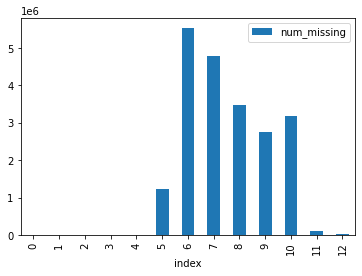

In [16]:
# сначала создаем индикатор для признаков с пропущенными данными
for col in train_df.columns:
    missing = train_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        train_df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in train_df.columns if 'ismissing' in col]
train_df['num_missing'] = train_df[ismissing_cols].sum(axis=1)

train_df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Отсюда понятно, что из 21 миллиона записей чуть более миллиона имеют только 4 пропущенного значения, более 5 млн. значений имеют 5 пропущенных значений и т.д. У 3-х миллионов значений имеются пропуски по 10 столбцам. 

**По обзорной таблице с признаками, где указаны минимальные и максимальные значения относительно к 75%-му квартилю, определяем выбросы и чистим их.**

Видим что у "high_resolution_engine_total_fuel_used" имеются отрицательные значения, которых не должно быть.

In [17]:
train_df[train_df['high_resolution_engine_total_fuel_used'] < 0]

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,...,axle_weight_ismissing,engine_speed_ismissing,speed_ismissing,accelerator_pedal_position_1_ismissing,brake_pedal_position_ismissing,ignition_lock_state_ismissing,battery_voltage_ismissing,battery_current_ismissing,soc_ismissing,num_missing
1833609,4,2020-11-23T11:26:51,2,-65.536,7942080.0,174.0,8.4,1229.0,45.0,-6.0,...,False,False,False,False,True,True,True,True,True,5
2920243,12,2020-11-27T11:06:50,5,-65.452,8134105.0,375.0,NaN,649.0,6.0,54.0,...,True,False,False,False,True,True,True,True,True,6
4355810,12,2020-11-24T11:26:56,5,-65.536,6987935.0,186.0,NaN,1090.0,69.0,NaN,...,True,False,False,True,True,True,True,True,True,7
4834020,12,2020-11-27T17:46:07,5,-65.536,8271455.0,612.0,NaN,1320.0,64.0,59.0,...,True,False,False,False,True,True,True,True,True,6
5383983,5,2020-12-03T17:25:59,12,-65.536,NaN,23.0,NaN,NaN,0.0,NaN,...,True,True,False,True,True,True,True,True,True,9
7476460,12,2020-12-01T13:06:31,5,-65.536,NaN,59.0,NaN,601.0,0.0,NaN,...,True,False,False,True,True,True,True,True,True,8
11374289,6,2020-12-27T12:31:13,13,-65.449,NaN,279.0,NaN,600.0,0.0,NaN,...,True,False,False,True,True,True,True,True,True,8
13244090,2,2020-12-20T13:09:27,0,-65.536,23527355.0,449.0,8.3,1059.0,67.0,NaN,...,False,False,False,True,True,True,True,True,True,6
14680532,5,2020-12-16T16:15:45,12,-65.536,12321045.0,355.0,NaN,1540.0,56.0,90.0,...,True,False,False,False,True,True,True,True,True,6
17247608,13,2020-12-16T04:39:47,7,-65.536,18184690.0,162.0,8.7,1019.0,83.0,NaN,...,False,False,False,True,True,True,True,True,True,6


In [18]:
train_df.loc[train_df['high_resolution_engine_total_fuel_used'] < 0, 'high_resolution_engine_total_fuel_used'] = train_df.loc[train_df['high_resolution_engine_total_fuel_used'] < 0, 'high_resolution_engine_total_fuel_used'] * -1

<AxesSubplot:>

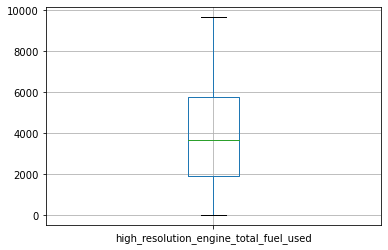

In [19]:
train_df.boxplot(column=['high_resolution_engine_total_fuel_used'])

In [20]:
train_df.describe() #Видим у "high_resolution_engine_total_fuel_used" минимальные значения равны 0

,imei,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc,num_missing
count,2.107815e+07,2.107815e+07,1.329470e+07,1.291337e+07,2.080979e+07,2.873371e+06,1.441178e+07,2.080979e+07,7.251471e+06,629792.000000,13555.000000,218694.000000,955205.000000,110094.000000,2.107815e+07
mean,5.681660e+00,5.241880e+00,3.927183e+03,1.215135e+07,1.567824e+02,8.232517e+00,1.026307e+03,5.547333e+01,4.021023e+01,10.514953,1.755515,27.609224,6.073393,64.711435,7.526572e+00
std,4.374764e+00,3.970053e+00,2.403368e+03,7.554679e+06,1.086809e+02,1.727127e+00,2.459370e+02,3.136238e+01,3.562578e+01,13.991099,0.826009,0.831857,11.595630,16.458868,1.544406e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.610000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-5.100000e+01,0.000000,0.000000,0.200000,-479.800000,0.000000,0.000000e+00
25%,2.000000e+00,2.000000e+00,1.916714e+03,5.833715e+06,9.900000e+01,8.200000e+00,9.480000e+02,3.300000e+01,1.900000e+01,1.000000,1.000000,27.700000,1.600000,53.600000,6.000000e+00
50%,5.000000e+00,5.000000e+00,3.677817e+03,1.124054e+07,1.360000e+02,8.500000e+00,1.047000e+03,6.900000e+01,4.500000e+01,6.000000,2.000000,27.900000,3.600000,67.500000,7.000000e+00
75%,1.000000e+01,8.000000e+00,5.783776e+03,1.804421e+07,1.840000e+02,8.900000e+00,1.185000e+03,8.100000e+01,6.700000e+01,15.000000,2.000000,28.000000,8.800000,77.200000,9.000000e+00
max,1.300000e+01,1.300000e+01,9.653434e+03,2.918320e+07,1.485000e+03,3.270000e+01,8.128000e+03,2.220000e+02,1.000000e+02,101.000000,3.000000,28.500000,123.100000,100.000000,1.200000e+01


Для удаления пиковых точек (выбросов) используем z-оценку
Создаём список из столбцов и удаляем столбцы, которые не хотим рассчитывать для оценки Z:

In [21]:
# cols = list(train_df.columns)
# cols.remove('imei')
# cols.remove('time')
# cols.remove('vin')
# train_df[cols]


In [22]:
# for col in cols:
#     col_zscore = col + '_zscore'
#     train_df[col_zscore] = (train_df[col] - train_df[col].mean())/train_df[col].std(ddof=0)
# train_df

In [23]:
# train_df.describe()

Благодаря данным по zscore можем рассчитывать на отсутствие выбросов в диаграммах зависимостей.

## Надо понять количество уникальных значений imei, vin, time

In [24]:
len(train_df)

21078151

In [25]:
len(train_df['imei'].unique())

14

In [26]:
len(train_df['vin'].unique())

14

По условиям задачи у одного vin может быть несколько imei. Следовательно, могут быть imei, у которых нет vin. Поробуем их сгруппировать. 

In [27]:
train_df.groupby('imei')['vin'].nunique()

imei
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
Name: vin, dtype: int64

Показано, что к каждому imei соответствует только 1 vin. 

Видно, как к каждому устройству телематики соотвествует только одно транспортное средство. Нужно связать их вместе, чтобы всегда видеть к какому imei соотвествует какой vin

In [28]:
train_df.groupby('imei')['vin'].unique()

imei
0      [4]
1      [1]
2      [0]
3      [3]
4      [2]
5     [12]
6     [13]
7      [9]
8     [11]
9     [10]
10     [8]
11     [6]
12     [5]
13     [7]
Name: vin, dtype: object

Эти первые 2 столбца можно принимать как единое. Расмотрим отрезки уникального времени

In [29]:
len(train_df['time'].unique())

3462148

time примерно в 85% случаях совпадают, а у 15% уникальны, то есть у большинства imei, vin время получения данных будет совпадать. Затем time - это объект, можно исключить этот объект и применив ниже код построить для всех значений диаграммы сколько данных для каждого значения. 

**Видно, что по imei №8, 9 у нас меньше всего данных. 
Их будем рассматривать отдельно ниже: есть ли в них данные из-за которых их можно использовать или можно исключить. Для "high_resolution_engine_total_fuel_used" и "high_resolution_total_vehicle_distance" данные расположены примерно одинаково плотно. Посмотрим на их корреляцию.**

In [30]:
train_df['imei'].value_counts() #показано каждый imei сколько раз встречается в столбце.

1     2414195
4     2214223
0     1992535
12    1974747
13    1963017
2     1952793
3     1938544
5     1624208
6     1460892
7     1202153
11    1131043
10    1020622
8      101374
9       87805
Name: imei, dtype: int64

In [31]:
df_filter1 = train_df['imei'].isin(['8','9'])
train_df[df_filter1]   #позволяет посмотреть нам только интересующие нас imei № 8, 9

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,...,axle_weight_ismissing,engine_speed_ismissing,speed_ismissing,accelerator_pedal_position_1_ismissing,brake_pedal_position_ismissing,ignition_lock_state_ismissing,battery_voltage_ismissing,battery_current_ismissing,soc_ismissing,num_missing


Посмотрим сколько данных в каждой ячейке каждого столбца в зависимости от imei. Это позволит нам потом удалить imei в которых  мало данных, или удалить повторяющиеся столбцы, или столбцы с малочисленными данными. 

In [32]:
train_df.groupby('imei').count()  #Позволяет увидеть в каждом imei относительно столбца сколько данных. 
#Видно imei 8,9 имеб мало данных по всем столбцам, vin повторяет time, поэтому imei 8,9, vin можно удалить.

,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,...,axle_weight_ismissing,engine_speed_ismissing,speed_ismissing,accelerator_pedal_position_1_ismissing,brake_pedal_position_ismissing,ignition_lock_state_ismissing,battery_voltage_ismissing,battery_current_ismissing,soc_ismissing,num_missing
imei,,,,,,,,,,,,,,,,,,,,,
0,1992535,1992535,1164356,1253878,1979077,254483,1385458,1979077,882119,56338,...,1992535,1992535,1992535,1992535,1992535,1992535,1992535,1992535,1992535,1992535
1,2414195,2414195,1513298,1431874,2393675,379444,1646648,2393675,727980,81940,...,2414195,2414195,2414195,2414195,2414195,2414195,2414195,2414195,2414195,2414195
2,1952793,1952793,1259387,1262015,1939317,299283,1373465,1939317,579908,58832,...,1952793,1952793,1952793,1952793,1952793,1952793,1952793,1952793,1952793,1952793
3,1938544,1938544,1237109,1211922,1915370,314480,1338943,1915370,798816,54697,...,1938544,1938544,1938544,1938544,1938544,1938544,1938544,1938544,1938544,1938544
4,2214223,2214223,1437456,1381346,2119427,333980,1482554,2119427,791072,47044,...,2214223,2214223,2214223,2214223,2214223,2214223,2214223,2214223,2214223,2214223
5,1624208,1624208,970075,1011066,1612492,253671,1143481,1612492,575158,55126,...,1624208,1624208,1624208,1624208,1624208,1624208,1624208,1624208,1624208,1624208
6,1460892,1460892,905886,863063,1420579,190478,956288,1420579,427323,48422,...,1460892,1460892,1460892,1460892,1460892,1460892,1460892,1460892,1460892,1460892
7,1202153,1202153,766190,704769,1193247,144908,819053,1193247,499830,41749,...,1202153,1202153,1202153,1202153,1202153,1202153,1202153,1202153,1202153,1202153
8,101374,101374,64328,49450,99483,4753,64736,99483,21769,4782,...,101374,101374,101374,101374,101374,101374,101374,101374,101374,101374


In [33]:
data = pd.read_csv("test_job_kamaz_v2.csv", index_col="imei")

data.head()

,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc
imei,,,,,,,,,,,,,,
12,2020-10-28T05:40:14,5,NaN,NaN,115.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
12,2020-10-28T06:55:52,5,NaN,NaN,112.0,2.3,1107.0,35.0,-49.0,NaN,NaN,NaN,22.8,NaN
12,2020-10-28T07:08:51,5,NaN,NaN,115.0,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
12,2020-10-28T07:14:15,5,NaN,NaN,118.0,NaN,753.0,9.0,16.0,0.0,NaN,NaN,19.0,NaN
0,2020-10-28T20:31:41,4,NaN,NaN,97.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
target = "time"  #Укажем в качестве целевой переменной время

y = data[target]
X = data.drop(target, axis=1)

In [35]:
X.drop(["vin"], axis=1, inplace=True) #Удаляем vin

In [36]:
X.info()   #Видим, что vin уже отсутствует

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21078151 entries, 12 to 4
Data columns (total 12 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   high_resolution_engine_total_fuel_used  float64
 1   high_resolution_total_vehicle_distance  float64
 2   altitude                                float64
 3   axle_weight                             float64
 4   engine_speed                            float64
 5   speed                                   float64
 6   accelerator_pedal_position_1            float64
 7   brake_pedal_position                    float64
 8   ignition_lock_state                     float64
 9   battery_voltage                         float64
 10  battery_current                         float64
 11  soc                                     float64
dtypes: float64(12)
memory usage: 2.0 GB


Удалим групповые строки imei 8, 9 

In [37]:
df = train_df.drop(train_df[train_df.imei == 8].index, inplace=True)

In [38]:
df = train_df.drop(train_df[train_df.imei == 9].index, inplace=True)

In [39]:
train_df.groupby('imei').count() #Видим что imei 8, 9 удалены

,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,...,axle_weight_ismissing,engine_speed_ismissing,speed_ismissing,accelerator_pedal_position_1_ismissing,brake_pedal_position_ismissing,ignition_lock_state_ismissing,battery_voltage_ismissing,battery_current_ismissing,soc_ismissing,num_missing
imei,,,,,,,,,,,,,,,,,,,,,
0,1992535,1992535,1164356,1253878,1979077,254483,1385458,1979077,882119,56338,...,1992535,1992535,1992535,1992535,1992535,1992535,1992535,1992535,1992535,1992535
1,2414195,2414195,1513298,1431874,2393675,379444,1646648,2393675,727980,81940,...,2414195,2414195,2414195,2414195,2414195,2414195,2414195,2414195,2414195,2414195
2,1952793,1952793,1259387,1262015,1939317,299283,1373465,1939317,579908,58832,...,1952793,1952793,1952793,1952793,1952793,1952793,1952793,1952793,1952793,1952793
3,1938544,1938544,1237109,1211922,1915370,314480,1338943,1915370,798816,54697,...,1938544,1938544,1938544,1938544,1938544,1938544,1938544,1938544,1938544,1938544
4,2214223,2214223,1437456,1381346,2119427,333980,1482554,2119427,791072,47044,...,2214223,2214223,2214223,2214223,2214223,2214223,2214223,2214223,2214223,2214223
5,1624208,1624208,970075,1011066,1612492,253671,1143481,1612492,575158,55126,...,1624208,1624208,1624208,1624208,1624208,1624208,1624208,1624208,1624208,1624208
6,1460892,1460892,905886,863063,1420579,190478,956288,1420579,427323,48422,...,1460892,1460892,1460892,1460892,1460892,1460892,1460892,1460892,1460892,1460892
7,1202153,1202153,766190,704769,1193247,144908,819053,1193247,499830,41749,...,1202153,1202153,1202153,1202153,1202153,1202153,1202153,1202153,1202153,1202153
10,1020622,1020622,654965,524990,1013889,88116,684022,1013889,320914,39209,...,1020622,1020622,1020622,1020622,1020622,1020622,1020622,1020622,1020622,1020622


In [40]:
train_df['int_fuel_used'] = train_df['high_resolution_engine_total_fuel_used'].apply(np.floor) #Зделаем округление данных

In [41]:
train_df['int_distance'] = train_df['high_resolution_total_vehicle_distance'].apply(np.floor)  #Зделаем округление данных

In [42]:
# train_df['int_fuel_used'] = train_df['int_fuel_used'].fillna(0).astype(np.int64) #Перевод в int64 если пригодится

In [43]:
# train_df['int_distance'] = train_df['int_distance'].fillna(0).astype(np.int64)  #Перевод в int64 если пригодится

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20888972 entries, 0 to 21078150
Data columns (total 30 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   imei                                              int64  
 1   time                                              object 
 2   vin                                               int64  
 3   high_resolution_engine_total_fuel_used            float64
 4   high_resolution_total_vehicle_distance            float64
 5   altitude                                          float64
 6   axle_weight                                       float64
 7   engine_speed                                      float64
 8   speed                                             float64
 9   accelerator_pedal_position_1                      float64
 10  brake_pedal_position                              float64
 11  ignition_lock_state                               float64
 12

In [45]:
train_df.tail()

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,...,speed_ismissing,accelerator_pedal_position_1_ismissing,brake_pedal_position_ismissing,ignition_lock_state_ismissing,battery_voltage_ismissing,battery_current_ismissing,soc_ismissing,num_missing,int_fuel_used,int_distance
21078146,4,2020-12-05T19:13:04,2,4660.886,15638890.0,33.0,NaN,1032.0,85.0,69.0,...,False,False,True,True,True,True,True,6,4660.0,15638890.0
21078147,4,2020-12-05T19:13:00,2,4660.856,15638765.0,33.0,NaN,1047.0,86.0,40.0,...,False,False,True,True,True,True,True,6,4660.0,15638765.0
21078148,4,2020-12-05T19:13:06,2,NaN,NaN,33.0,NaN,NaN,84.0,NaN,...,False,True,True,True,True,False,True,9,NaN,NaN
21078149,4,2020-12-05T19:13:02,2,4660.866,15638815.0,33.0,NaN,1036.0,85.0,56.0,...,False,False,True,True,True,True,True,6,4660.0,15638815.0
21078150,4,2020-12-05T19:13:02,2,4660.872,15638840.0,33.0,NaN,1038.0,85.0,60.0,...,False,False,True,True,True,True,True,6,4660.0,15638840.0


## Визуализиация данных

In [46]:
# !pip install brewer2mpl
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings('ignore')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


**Построим общую зависимость пройденного пути от расхода топлива.** 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

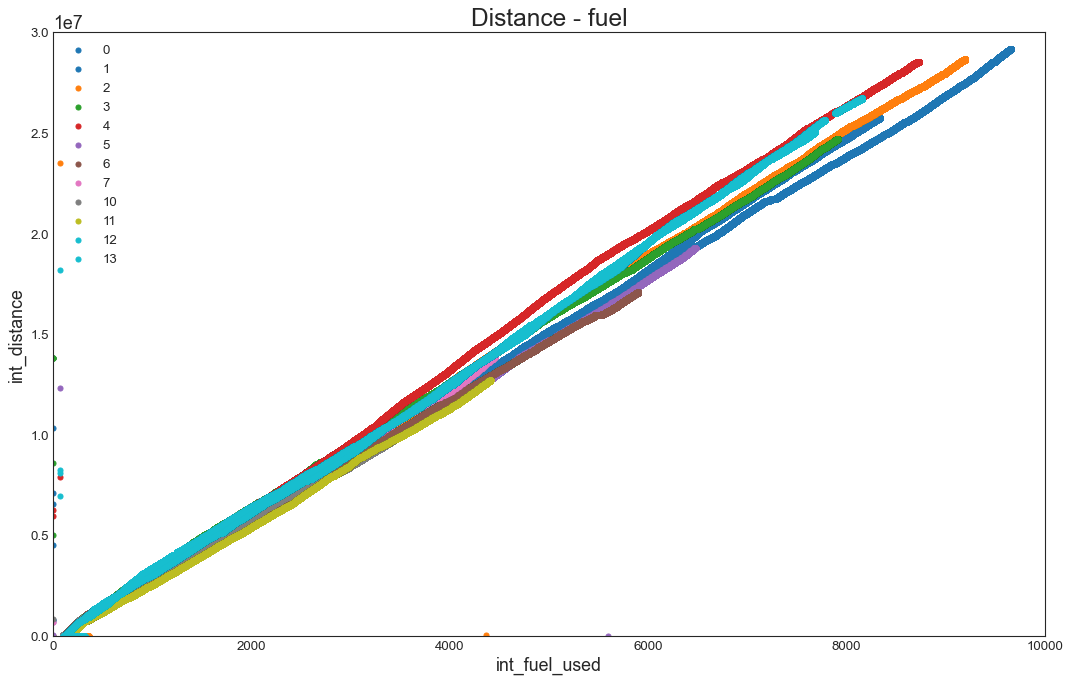

In [47]:
categories = np.unique(train_df['imei'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, imei in enumerate(categories):
    plt.scatter('int_fuel_used', 'int_distance', 
                data=train_df.loc[train_df.imei==imei, :], 
                s=20, c=colors[i], label=str(imei))

# Decorations
plt.gca().set(xlim=(0.0, 10000), ylim=(0, 30000000),
              xlabel='int_fuel_used', ylabel='int_distance')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Distance - fuel", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

Видим, что некоторые значения выпадают - это значения Nan. 

### Обработка пропусков   
Рассмотрим количество Nan. 

In [48]:
train_df.isna().sum(axis = 0)

imei                                                       0
time                                                       0
vin                                                        0
high_resolution_engine_total_fuel_used               7715293
high_resolution_total_vehicle_distance               8067443
altitude                                              263701
axle_weight                                         18024160
engine_speed                                         6598080
speed                                                 263701
accelerator_pedal_position_1                        13684993
brake_pedal_position                                20268083
ignition_lock_state                                 20875725
battery_voltage                                     20672852
battery_current                                     19944680
soc                                                 20780905
high_resolution_engine_total_fuel_used_ismissing           0
high_resolution_total_ve

При 21 миллионе данных количество Nan в ряде столбцов очень много, при этом данные изменяются от времени, поэтому мы не можем их заменить только на среднее, медианную или моду, как в 2-х примерах ниже - это будет большая ошибка. Строки с Nan, там где надо  удаляем или игнорорируем.

**high_resolution_engine_total_fuel_used**

In [49]:
train_df.loc[train_df['int_fuel_used'].isnull(), 'int_fuel_used'] = train_df['int_fuel_used'].mean()

**high_resolution_total_vehicle_distance**

In [50]:
train_df.loc[train_df['int_distance'].isnull(), 'int_distance'] = train_df['int_distance'].mean()

В качестве примера для столбца 'soc' попытался построить среднее по 2-м значениям "соседей", но так как и соседи Nan, ничего из этого не вышло.

In [51]:
lfc=train_df['soc']
lfc= [np.nan if x == 'Nan' else x for x in lfc ]


for i in range(0,len(lfc)):
    if lfc[0] is np.nan:
        lfc[0]=lfc[1]
    elif lfc[i] is np.nan:
        lfc[i]=(lfc[i-1]+lfc[i+1])/2
    elif lfc[len(lfc)-1] is np.nan:
        lfc[len(lfc)-1]=lfc[len(lfc)-2]

In [52]:
train_df.isna().sum(axis = 0)

imei                                                       0
time                                                       0
vin                                                        0
high_resolution_engine_total_fuel_used               7715293
high_resolution_total_vehicle_distance               8067443
altitude                                              263701
axle_weight                                         18024160
engine_speed                                         6598080
speed                                                 263701
accelerator_pedal_position_1                        13684993
brake_pedal_position                                20268083
ignition_lock_state                                 20875725
battery_voltage                                     20672852
battery_current                                     19944680
soc                                                 20780905
high_resolution_engine_total_fuel_used_ismissing           0
high_resolution_total_ve

In [53]:
train_df.loc[train_df['soc'].isnull(), 'soc'] = train_df['soc'].median()

In [54]:
len(train_df) - train_df.count()

imei                                                       0
time                                                       0
vin                                                        0
high_resolution_engine_total_fuel_used               7715293
high_resolution_total_vehicle_distance               8067443
altitude                                              263701
axle_weight                                         18024160
engine_speed                                         6598080
speed                                                 263701
accelerator_pedal_position_1                        13684993
brake_pedal_position                                20268083
ignition_lock_state                                 20875725
battery_voltage                                     20672852
battery_current                                     19944680
soc                                                        0
high_resolution_engine_total_fuel_used_ismissing           0
high_resolution_total_ve

## Корреляционная метрика данных относительно друг друга

## Построим зависимости расхода топлива на 100 км: 1) от массы

Произведём расчёт расхода топлива на 100 км, создав столбец "fuel/100km"

In [55]:
train_df['fuel_100km'] = np.where(train_df['high_resolution_total_vehicle_distance'] < 1, train_df['high_resolution_total_vehicle_distance'], train_df['high_resolution_engine_total_fuel_used']/train_df['high_resolution_total_vehicle_distance']*100000)
train_df.tail()

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,...,accelerator_pedal_position_1_ismissing,brake_pedal_position_ismissing,ignition_lock_state_ismissing,battery_voltage_ismissing,battery_current_ismissing,soc_ismissing,num_missing,int_fuel_used,int_distance,fuel_100km
21078146,4,2020-12-05T19:13:04,2,4660.886,15638890.0,33.0,NaN,1032.0,85.0,69.0,...,False,True,True,True,True,True,6,4660.00000,1.563889e+07,29.803177
21078147,4,2020-12-05T19:13:00,2,4660.856,15638765.0,33.0,NaN,1047.0,86.0,40.0,...,False,True,True,True,True,True,6,4660.00000,1.563876e+07,29.803223
21078148,4,2020-12-05T19:13:06,2,NaN,NaN,33.0,NaN,NaN,84.0,NaN,...,True,True,True,True,False,True,9,3960.77964,1.223509e+07,NaN
21078149,4,2020-12-05T19:13:02,2,4660.866,15638815.0,33.0,NaN,1036.0,85.0,56.0,...,False,True,True,True,True,True,6,4660.00000,1.563882e+07,29.803192
21078150,4,2020-12-05T19:13:02,2,4660.872,15638840.0,33.0,NaN,1038.0,85.0,60.0,...,False,True,True,True,True,True,6,4660.00000,1.563884e+07,29.803182


In [56]:
train_df.groupby('axle_weight').count()  #Рассмотрим нагрузку на заднюю ось грузовика. Видим распределение её от 0 до 32 тонн. 

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,...,accelerator_pedal_position_1_ismissing,brake_pedal_position_ismissing,ignition_lock_state_ismissing,battery_voltage_ismissing,battery_current_ismissing,soc_ismissing,num_missing,int_fuel_used,int_distance,fuel_100km
axle_weight,,,,,,,,,,,,,,,,,,,,,
0.00,2,2,2,2,2,2,2,2,1,0,...,2,2,2,2,2,2,2,2,2,2
1.10,4,4,4,3,0,1,4,1,1,2,...,4,4,4,4,4,4,4,4,4,0
1.20,5,5,5,5,0,3,4,3,1,3,...,5,5,5,5,5,5,5,5,5,0
1.30,5,5,5,2,0,5,1,5,0,1,...,5,5,5,5,5,5,5,5,5,0
1.40,31,31,31,15,1,29,20,29,2,5,...,31,31,31,31,31,31,31,31,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20.50,5,5,5,5,0,5,4,5,1,4,...,5,5,5,5,5,5,5,5,5,0
20.55,1,1,1,1,0,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,0
20.60,2,2,2,2,0,2,2,2,0,2,...,2,2,2,2,2,2,2,2,2,0


Если масса самого тягача порядка 8 тонн, при добавлении максимальной 32 тонны на ось, получаем вес тягача с грузом 40 тонн. При построении диаграммы зависимости необходимо оставить данные только в диапазоне до 40 тонн.

In [57]:
train_df.groupby('fuel_100km').count() # Присутствуют выбросы в расходе топллива на 100 км, которых надо почистить.

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,...,speed_ismissing,accelerator_pedal_position_1_ismissing,brake_pedal_position_ismissing,ignition_lock_state_ismissing,battery_voltage_ismissing,battery_current_ismissing,soc_ismissing,num_missing,int_fuel_used,int_distance
fuel_100km,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,26,26,26,23,26,9,6,5,9,4,...,26,26,26,26,26,26,26,26,26,26
1.000000e-01,6,6,6,4,6,6,3,6,6,6,...,6,6,6,6,6,6,6,6,6,6
2.000000e-01,3,3,3,2,3,3,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2.785523e-01,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
3.000000e-01,7,7,7,0,7,7,0,7,7,4,...,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.250000e+06,1,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
4.387097e+06,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5.961538e+06,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [58]:
df = train_df.drop(train_df[train_df.fuel_100km > 55].index, inplace=True)
df = train_df.drop(train_df[train_df.fuel_100km < 20].index, inplace=True)

In [59]:
train_df.groupby('fuel_100km').count()

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,...,speed_ismissing,accelerator_pedal_position_1_ismissing,brake_pedal_position_ismissing,ignition_lock_state_ismissing,battery_voltage_ismissing,battery_current_ismissing,soc_ismissing,num_missing,int_fuel_used,int_distance
fuel_100km,,,,,,,,,,,,,,,,,,,,,
29.175014,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
29.175075,1,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
29.175240,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
29.175276,1,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
29.175337,1,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54.995845,1,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
54.996334,1,1,1,1,1,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
54.997076,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


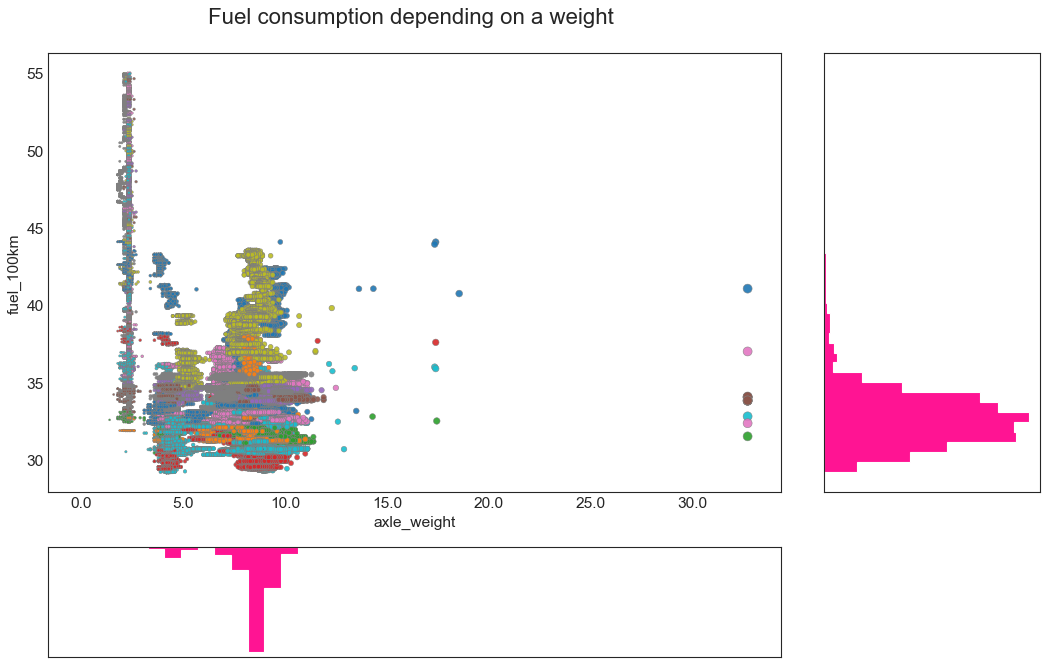

In [60]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('axle_weight', 'fuel_100km', s=train_df.axle_weight*2, c=train_df.imei.astype('category').cat.codes, alpha=.9, data=train_df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(train_df.axle_weight, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
ax_right.hist(train_df.fuel_100km, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Fuel consumption depending on a weight \n ', xlabel='axle_weight', ylabel='fuel_100km')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()


**Мы можем не учитывать минимальное значение нагрузки на заднюю ось грузовика в диапазоне 2-х тонн, где расход топливо от 32 до 50 и более литров на 100 км. Скорей всего грузовик был негружёный, долго прогревался, был на холостом ходу, что отразился в большом расходе топлива. В целом по диаграмме видно как если при нагрузке в 5 тонн расход топлива от 29 до 36 литров на 100 км, то при нагрузке в 10 тонн расход увеличивается с 29 до 43 литров на 100 км. Высокий расход топлива особенно для 2-х грузовиков, обозначенные синим и слабо зелёным цветом.**

**Основное количество данных получено для нагрузки 8, 9 тонн нагрузки и расход топлива от 30 до 35 литров на 100 км.**

### 2) Рассмотрим тот же расход топлива на 100 км от оборотов двигателя (engine_speed)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

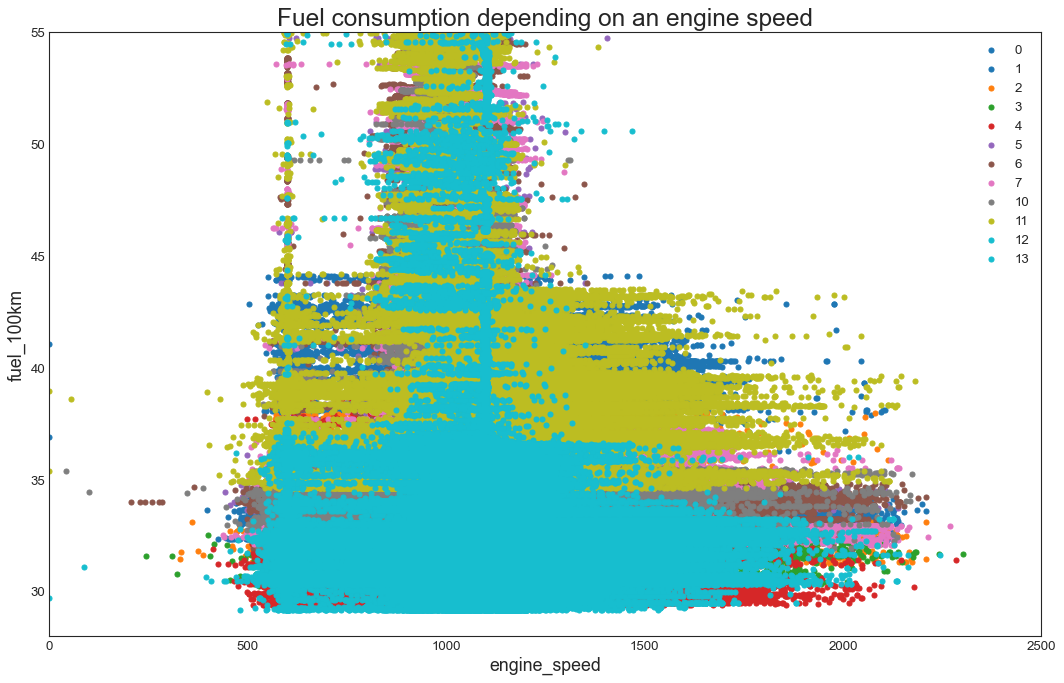

In [61]:
categories = np.unique(train_df['imei'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, imei in enumerate(categories):
    plt.scatter('engine_speed', 'fuel_100km', 
                data=train_df.loc[train_df.imei==imei, :], 
                s=20, c=colors[i], label=str(imei))

# Decorations
plt.gca().set(xlim=(0.0, 2500), ylim=(28, 55),
              xlabel='engine_speed', ylabel='fuel_100km')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Fuel consumption depending on an engine speed", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

**Видно, что на расход топлива не влияют обороты двигателя, скорей есть различия в грузовиках: одни больше потребляют топливо на 100 км, другие меньше. Как доказательство предыдущей гипотезы, большое потребление топливо было на холостом ходу, когда грузовик прогревался или стоял на месте с включённым двигателем.**

## 3) Рассмотрим расход топлива на 100 км от  скорости (speed)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

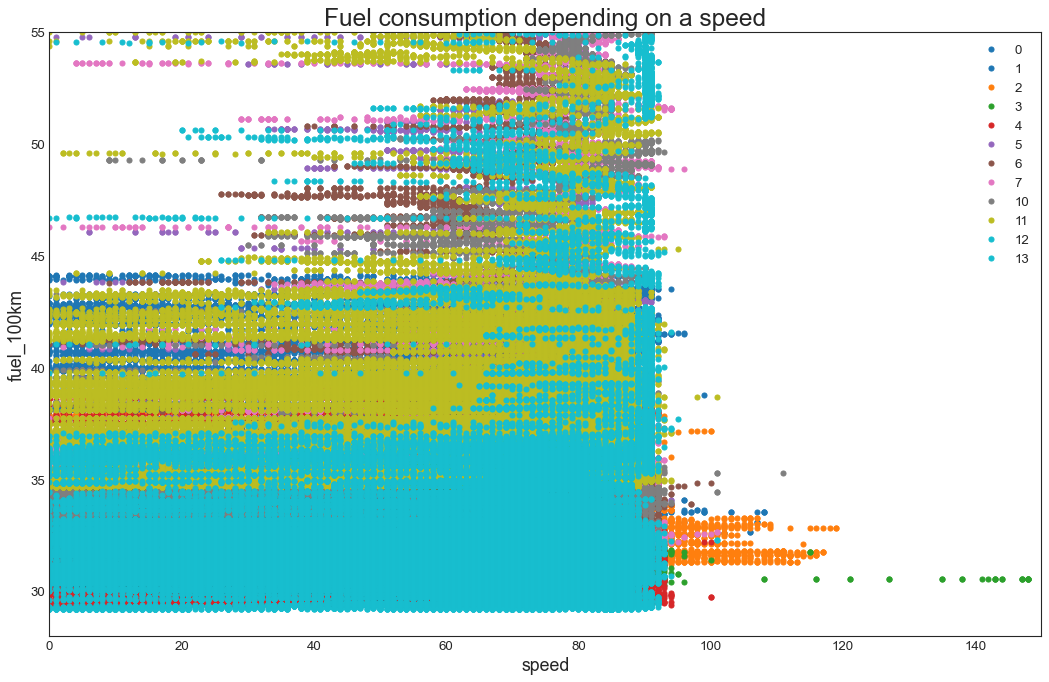

In [62]:
categories = np.unique(train_df['imei'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, imei in enumerate(categories):
    plt.scatter('speed', 'fuel_100km', 
                data=train_df.loc[train_df.imei==imei, :], 
                s=20, c=colors[i], label=str(imei))

# Decorations
plt.gca().set(xlim=(0.0, 150), ylim=(28, 55),
              xlabel='speed', ylabel='fuel_100km')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Fuel consumption depending on а speed", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

**По диаграмме выше ясно, что все грузовые автомобили ездили в диапазоне до 90 км./ч. Очевидной корреляции увеличения расхода топлива от скорости не наблюдается. Различия несут по самим грузовикам, имеющие разный вес.** 

## 4) Рассмотрим расход топлива на 100 км от рельефа (altitude)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

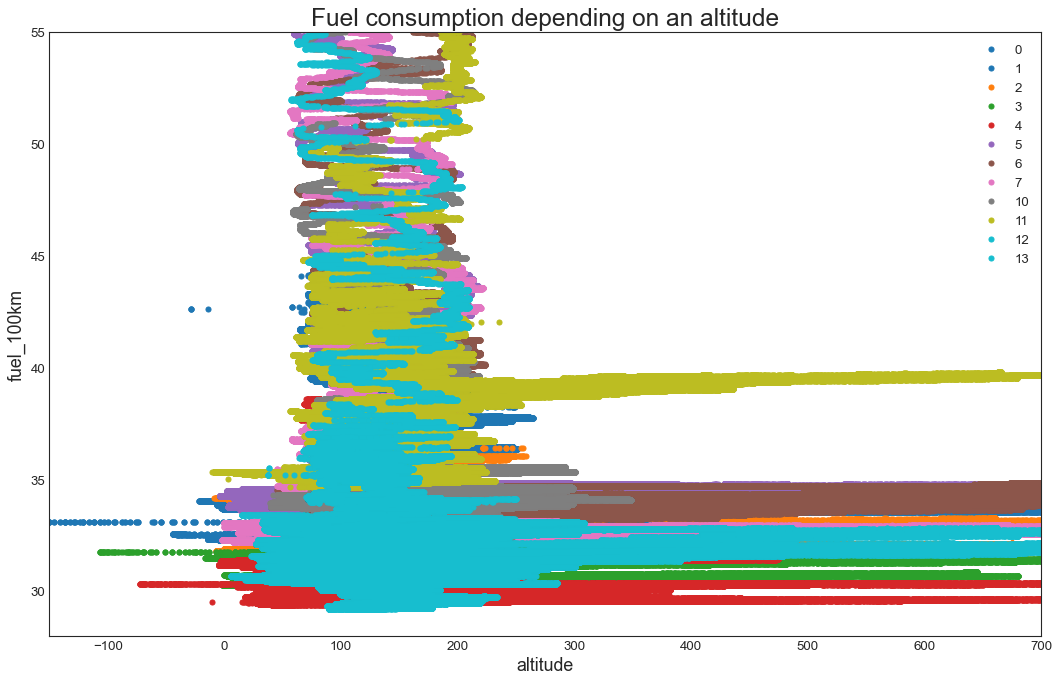

In [63]:
categories = np.unique(train_df['imei'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, imei in enumerate(categories):
    plt.scatter('altitude', 'fuel_100km', 
                data=train_df.loc[train_df.imei==imei, :], 
                s=20, c=colors[i], label=str(imei))

# Decorations
plt.gca().set(xlim=(-150, 700), ylim=(28, 55),
              xlabel='altitude', ylabel='fuel_100km')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Fuel consumption depending on an altitude", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

**На диаграмме выше имеется прекрасный пример как у грузовика с imei №11 по мере увеличения высоты над уровнем море от 200 до 400 метров имелся плавное увеличение расхода топлива. В целом такой закономерности не наблюдается, что говорит о imei №11 как исключительный случай.** 

## Рассмотрим расход топлива по выбранным отрезкам пути. Вначале увидим общую картину

**Переведём time из формата object в формат datetime**

In [64]:
#Load in the data
dt = pd.read_csv('test_job_kamaz_v2.csv')

#Change the 'time' column into DateTime
dt['time']=pd.to_datetime(dt['time'])

In [65]:
dt.head()
# dt.info()

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc
0,12,2020-10-28 05:40:14,5,NaN,NaN,115.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,12,2020-10-28 06:55:52,5,NaN,NaN,112.0,2.3,1107.0,35.0,-49.0,NaN,NaN,NaN,22.8,NaN
2,12,2020-10-28 07:08:51,5,NaN,NaN,115.0,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN
3,12,2020-10-28 07:14:15,5,NaN,NaN,118.0,NaN,753.0,9.0,16.0,0.0,NaN,NaN,19.0,NaN
4,0,2020-10-28 20:31:41,4,NaN,NaN,97.0,NaN,NaN,79.0,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
dt['fuel_100km'] = np.where(dt['high_resolution_total_vehicle_distance'] < 1, dt['high_resolution_total_vehicle_distance'], dt['high_resolution_engine_total_fuel_used']/dt['high_resolution_total_vehicle_distance']*100000)
dt.tail()

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc,fuel_100km
21078146,4,2020-12-05 19:13:04,2,4660.886,15638890.0,33.0,NaN,1032.0,85.0,69.0,NaN,NaN,NaN,NaN,NaN,29.803177
21078147,4,2020-12-05 19:13:00,2,4660.856,15638765.0,33.0,NaN,1047.0,86.0,40.0,NaN,NaN,NaN,NaN,NaN,29.803223
21078148,4,2020-12-05 19:13:06,2,NaN,NaN,33.0,NaN,NaN,84.0,NaN,NaN,NaN,NaN,2.6,NaN,NaN
21078149,4,2020-12-05 19:13:02,2,4660.866,15638815.0,33.0,NaN,1036.0,85.0,56.0,NaN,NaN,NaN,NaN,NaN,29.803192
21078150,4,2020-12-05 19:13:02,2,4660.872,15638840.0,33.0,NaN,1038.0,85.0,60.0,NaN,NaN,NaN,NaN,NaN,29.803182


In [67]:
dt1 = dt.drop(dt[dt.fuel_100km > 47].index, inplace=True)
dt1 = dt.drop(dt[dt.fuel_100km < 28].index, inplace=True)

In [68]:
dt.groupby('fuel_100km').count() 

,imei,time,vin,high_resolution_engine_total_fuel_used,high_resolution_total_vehicle_distance,altitude,axle_weight,engine_speed,speed,accelerator_pedal_position_1,brake_pedal_position,ignition_lock_state,battery_voltage,battery_current,soc
fuel_100km,,,,,,,,,,,,,,,
29.175014,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0
29.175075,1,1,1,1,1,1,0,1,1,0,1,0,0,0,0
29.175240,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0
29.175276,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0
29.175337,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46.999667,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0
46.999731,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0
46.999801,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0


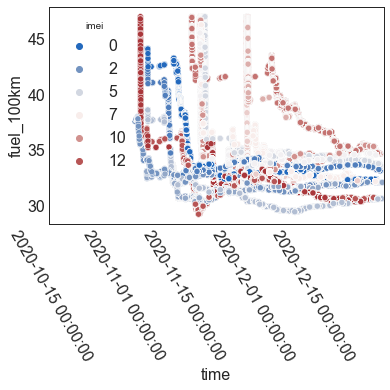

In [69]:
dt['time']=pd.to_datetime(dt['time'])
# train_df.time = pd.to_datetime(train_df.time)  #unit='ms'
ax = sns.scatterplot(data=dt, x="time", y="fuel_100km", hue='imei', palette="vlag")
ax.set_xlim(dt['time'].min(), dt['time'].max())
myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(myFmt)
for item in ax.get_xticklabels():
    item.set_rotation(300)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

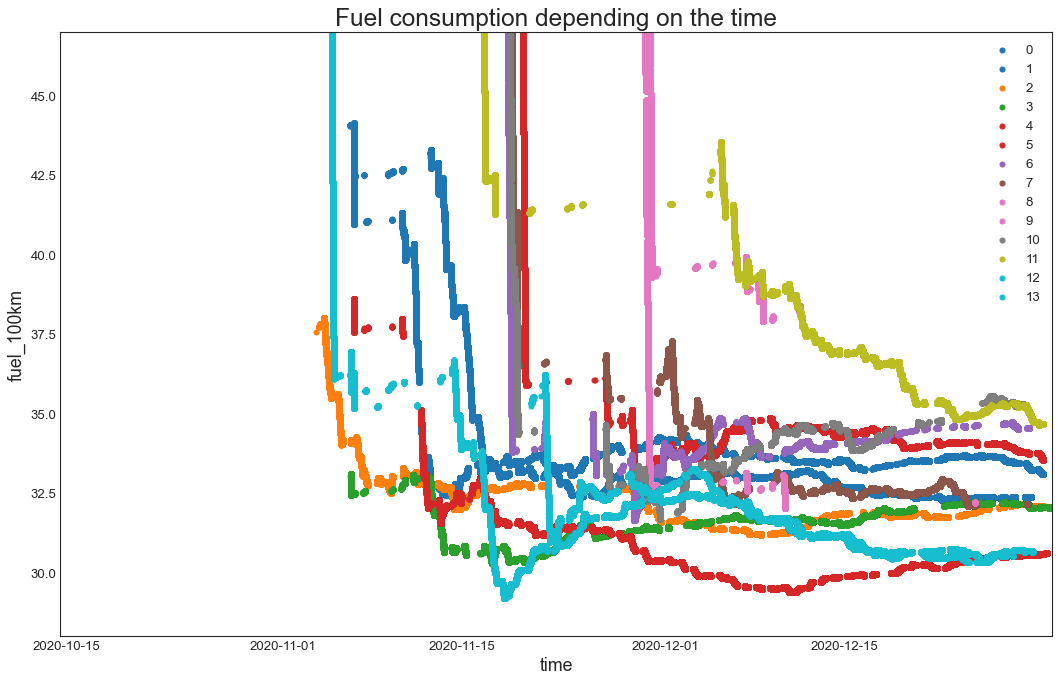

In [72]:
categories = np.unique(dt['imei'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, imei in enumerate(categories):
    plt.scatter('time', 'fuel_100km', 
                data=dt.loc[dt.imei==imei, :], 
                s=20, c=colors[i], label=str(imei))

# Decorations
plt.gca().set(xlim=(dt['time'].min(), dt['time'].max()), ylim=(28, 47),
              xlabel='time', ylabel='fuel_100km')


plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Fuel consumption depending on the time", fontsize=22)
plt.legend(fontsize=12)    
plt.show()  

**По диаграмме выше видно, что основное количество данных поступило в промежутке между 1 ноября и 15 декабря 2020 года. Можем более детально расмотреть этот промежуток времени**

In [74]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 21000000

In [75]:
df = dt[['fuel_100km', 'time']]
start_time = '2020-11-01 00:00:00'
end_time = '2020-12-21 00:00:00'

df = df[(dt['time'] > start_time) & (dt['time'] <= end_time)]
df = dt.set_index('time')

plt.figure(figsize = (18,9))
plt.plot(pd.to_datetime(dt.index),dt["fuel_100km"])
plt.xlabel('Time',fontsize=18)
plt.ylabel('fuel_100km',fontsize=18)

Text(0, 0.5, 'fuel_100km')

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 1296x648 with 1 Axes>

In [ ]:
# from pandas import Series
# from matplotlib import pyplot

In [ ]:
# df3 = pd.read_csv('test_job_kamaz_v2.csv', delimiter=r"\s+", names=['time'])

In [ ]:
# for i, r in df3.iterrows():
#     print (type(r['time']))

In [ ]:
# dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

# df = pd.read_csv('test_job_kamaz_v2.csv', parse_dates=['time'], date_parser=dateparse)

In [ ]:
# df = train_df[(train_df['time'])]
# # df = df.drop_duplicates('TIME')
# df = train_df.sort_values(['time'], ascending=[True])
# df = train_df.set_index('time')

# plt.figure(figsize=(18, 9))
# plt.plot(train_pd.to_datetime(train_df.index), train_df["PRICE"])
# plt.xlabel('time', fontsize=18)
# plt.ylabel('fuel_100km', fontsize=18)

In [ ]:
# train_df.pivot_table(
#     values='fuel_100km', index='imei',
#     columns='time').cumsum().iplot(
#         mode='markers+lines',
#         size=8,
#         symbol=[1, 2, 3, 4, 5],
#         layout=dict(
#             xaxis=dict(title='time'),
#             yaxis=dict(type='log', title='fuel_100km'),
#             title='Total Views over Time by Publication'))

In [ ]:
import pandas
import seaborn
from matplotlib import pyplot, dates
%matplotlib inline

date = ['1975-12-03','2008-08-20', '2011-03-16']
value = [1,4,5]
df = pandas.DataFrame({
    'date': pandas.to_datetime(date),   # pandas dates
    'datenum': dates.datestr2num(date), # maptlotlib dates
    'value': value
})

@pyplot.FuncFormatter
def fake_dates(x, pos):
    """ Custom formater to turn floats into e.g., 2016-05-08"""
    return dates.num2date(x).strftime('%Y-%m-%d')

fig, ax = pyplot.subplots()
# just use regplot if you don't need a FacetGrid
seaborn.regplot('datenum', 'value', data=df, ax=ax)

# here's the magic:
ax.xaxis.set_major_formatter(fake_dates)

# legible labels
ax.tick_params(labelrotation=45)

In [ ]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

v1=np.datetime64('2017-09-13T05:12:56.089000000')
v2=np.datetime64('2017-09-13T11:51:30.089000000')

t = lambda x: myFmt(mdates.date2num(x.astype('<M8[s]').item()))

plt.annotate(t(v1), xy=(v1, 1), xytext=(0, 10), textcoords='offset points', )
plt.annotate(t(v2), xy=(v2, 1), xytext=(0, 10), textcoords='offset points',ha="right" )

plt.hlines(1,v1,v2)
myFmt = mdates.DateFormatter('%H:%M:%S')

plt.gca().xaxis.set_major_formatter(myFmt)
plt.gca().xaxis.set_major_locator(mdates.HourLocator()) 

plt.show()